## Final Project Submission

Please fill out:
* Student name: Harun Ahmed 
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita 
* Blog post URL:

### Project Overview:

This data science project intends to help Microsoft establish its new movie studio by performing exploratory data analysis (EDA) to better understand the landscape of successful films in the industry. By studying box office performance and film attributes, Microsoft will gain actionable information to aid its decision-making process.





































### General objectives:

Investigate current film industry trends to determine what types of films are doing well at the box office.

Identify Key Success Factors: Determine the elements that contribute to movie success, such as genre, budget.


### Specific objectives:

Identify prevailing trends and preferences in the film industry to guide Microsoft's movie production strategy.
Analyze successful movie strategies to derive insights for Microsoft's movie production and marketing efforts

### DATA UNDERSTANDING 

## The data


### Importing the relevant libraries
import pandas numpy csv and their aliases


In [340]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 
import seaborn as sns
import sqlite3
conn = sqlite3.connect('im.db')

In [341]:
# Load data from tn.movie_budgets.csv.gz into a dataframe
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

# Convert columns to numeric data types
movies_budget[['production_budget', 'domestic_gross', 'worldwide_gross']] = movies_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].replace('[^.0-9]', '', regex=True).astype({'production_budget': 'float32', 'domestic_gross': 'float32', 'worldwide_gross': 'float64'})

# Display the first 5 rows of the dataframe
movies_budget.head(6)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662208.0,2.053311e+09


In [342]:

# Load data from tn.movie_budgets.csv.gz into a dataframe
tmdb_movies= pd.read_csv('zippedData/tmdb.movies.csv.gz')



In [343]:


gzipped_file_path = 'zippedData/rt.reviews.tsv.gz'

# Read the compressed file into a DataFrame
movies_reviews = pd.read_csv(gzipped_file_path, sep='\t', compression='gzip', encoding='latin1')


In [344]:



gzipped_file_path = 'zippedData\\rt.movie_info.tsv.gz'

# Read the compressed file into a DataFrame
rt_movies = pd.read_csv(gzipped_file_path, sep='\t', compression='gzip', encoding='latin1')


In [345]:
gzipped_file_path = 'zippedData\\bom.movie_gross.csv.gz'

# Read the compressed file into a DataFrame
bom_movies = pd.read_csv(gzipped_file_path, sep='\t', compression='gzip', encoding='latin1')

In [346]:

gzipped_file_path = 'zippedData\\rt.reviews.tsv.gz'

# Read the compressed file into a DataFrame
rt_reviews = pd.read_csv(gzipped_file_path, sep='\t', compression='gzip', encoding='latin1')

In [347]:
gzipped_file_path = 'zippedData\\tn.movie_budgets.csv.gz'

# Read the compressed file into a DataFrame
tn_movies = pd.read_csv(gzipped_file_path, sep='\t', compression='gzip', encoding='latin1')

In [348]:
# Displaying information about the dataset
print(movies_budget.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float32
 4   domestic_gross     5782 non-null   float32
 5   worldwide_gross    5782 non-null   float64
dtypes: float32(2), float64(1), int64(1), object(2)
memory usage: 226.0+ KB
None


In [349]:
# Counting missing values in each column of the dataset
missing_values_count = movies_budget.isna().sum()
print(missing_values_count)


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [350]:
# Checking for Duplicate values
duplicates_count = len(movies_budget[movies_budget.duplicated()])
print(duplicates_count)


0


In [351]:
# Convert budget and gross columns to numeric types
cols_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']
movies_budget[cols_to_clean] = movies_budget[cols_to_clean].replace('[\$,]', '', regex=True).astype(float)
movies_budget.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507648.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063872.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762352.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005856.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181376.0,1.316722e+09


### Conducting exploratory data analysis on the movie_budgets dataset

In [352]:
# Display descriptive statistics for budget and revenue columns
print(movies_budget[['production_budget', 'domestic_gross', 'worldwide_gross']].describe())


       production_budget  domestic_gross  worldwide_gross
count       5.782000e+03    5.782000e+03     5.782000e+03
mean        3.158776e+07    4.187333e+07     9.148746e+07
std         4.181208e+07    6.824060e+07     1.747200e+08
min         1.100000e+03    0.000000e+00     0.000000e+00
25%         5.000000e+06    1.429534e+06     4.125415e+06
50%         1.700000e+07    1.722595e+07     2.798445e+07
75%         4.000000e+07    5.234866e+07     9.764584e+07
max         4.250000e+08    9.366622e+08     2.776345e+09


In [353]:
# Calculate total gross revenue by adding 'domestic_gross' and 'worldwide_gross'
movies_budget['total_gross'] = movies_budget['domestic_gross'] + movies_budget['worldwide_gross']

# Find the movie with the highest total gross revenue
movie_with_highest_gross = movies_budget.loc[movies_budget['total_gross'].idxmax()]

# Print the movie with the highest total gross revenue
print(f"Movie with the highest total gross revenue: {movie_with_highest_gross['movie']}, Total Gross: {movie_with_highest_gross['total_gross']}")


Movie with the highest total gross revenue: Avatar, Total Gross: 3536852927.0


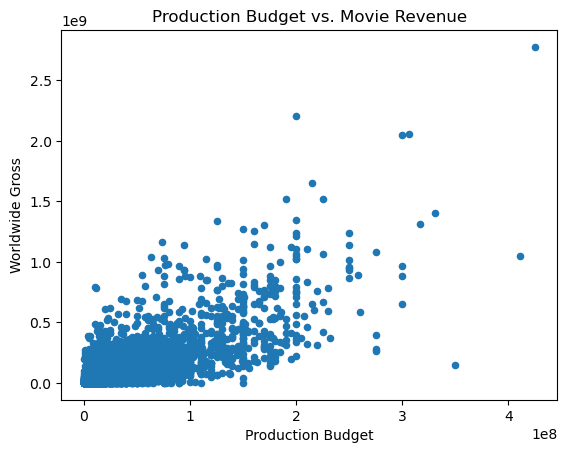

In [354]:
# Create scatter plot for production budget vs. worldwide gross
movies_budget.plot.scatter(x='production_budget', y='worldwide_gross')
plt.title('Production Budget vs. Movie Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.savefig('budget_revenue.png')
plt.show()


In [355]:
# Show the first few rows of the tmdb_movies dataset to preview its content

tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [356]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [357]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [358]:
#checking for duplicates
duplicates = tmdb_movies[tmdb_movies.duplicated()]
len(duplicates)

0

Data has no dublicate or missing values

### Applying exploratory data analysis to the dataset tmdb_movies
### based on the distribution movie ratings

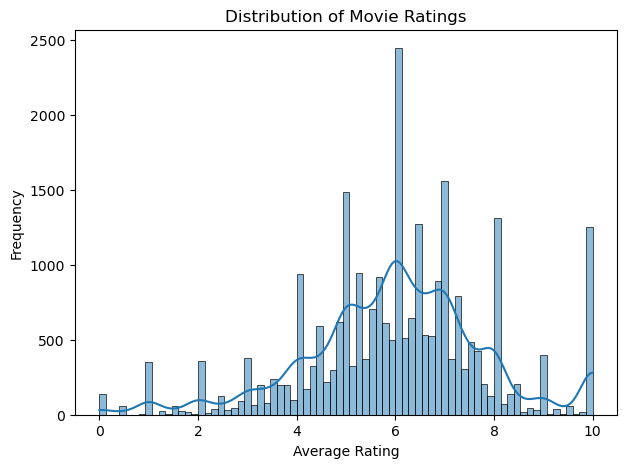

In [359]:
# Plotting a histogram for movie ratings (vote_average)
plt.figure(figsize=(7, 5))
sns.histplot(tmdb_movies['vote_average'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

In [360]:

rt_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [361]:
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [362]:
rt_movies.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

as you can see, missing values are there. To deal with that we need to clean it.

In [363]:
# Drop rows with missing values in specified columns
rt_movies.dropna(subset=['synopsis', 'box_office', 'currency', 'runtime', 'director', 'writer', 'studio', 'theater_date', 'dvd_date', 'rating'], inplace=True)

# Display the first few rows of the DataFrame
rt_movies.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [364]:
# Check for missing values and sum them up
missing_values = rt_movies.isna().sum()

# Display the count of missing values
missing_values


id              0
synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

Now lets analyzing exploratory data based on directors, genre distribution, and rating

In [365]:
rt_movies.describe()

,id
count,235.000000
mean,1010.217021
std,578.522979
min,3.000000
25%,488.500000
50%,1044.000000
75%,1526.000000
max,1985.000000


In [366]:
# Count the occurrences of each rating
rating_counts = rt_movies['rating'].value_counts()

# Display the counts
rating_counts


rating
R        105
PG-13     77
PG        38
NR         9
G          5
NC17       1
Name: count, dtype: int64

In [367]:
# Count the frequency of each unique genre
genre_counts = rt_movies['genre'].value_counts()

# Display the counts
genre_counts


genre
Drama                                                                        33
Comedy                                                                       32
Comedy|Drama                                                                 22
Drama|Mystery and Suspense                                                   11
Comedy|Drama|Romance                                                          9
                                                                             ..
Comedy|Mystery and Suspense                                                   1
Art House and International|Horror|Mystery and Suspense                       1
Art House and International|Comedy|Drama                                      1
Action and Adventure|Art House and International|Comedy|Cult Movies|Drama     1
Action and Adventure|Art House and International                              1
Name: count, Length: 76, dtype: int64

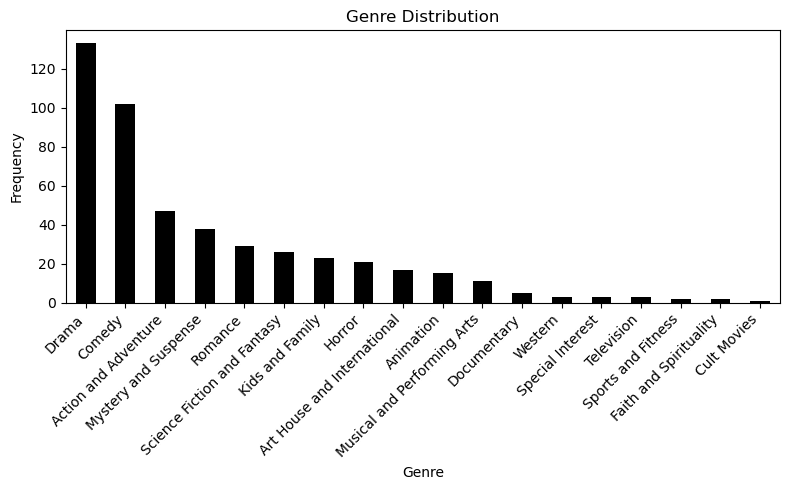

In [368]:
# Splitting combined genres and stacking them into separate rows
genres = rt_movies['genre'].str.split('|').explode()

# Plotting the genre distribution
plt.figure(figsize=(8, 5))
genres.value_counts().plot(kind='bar', color='black')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()


In [369]:
# Analysing top 10 directors
top_directors = rt_movies['director'].value_counts().nlargest(10)
top_directors


director
Clint Eastwood     3
Sam Mendes         2
Bryan Singer       2
Barry Levinson     2
Ang Lee            2
Seth MacFarlane    2
Gore Verbinski     2
Jay Roach          2
Kasi Lemmons       2
Brian Robbins      2
Name: count, dtype: int64

In [370]:
rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [371]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [372]:
# Check for missing values
missing_values = rt_reviews.isna().sum()
missing_values


id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

As you can see we have missing data, lets clean it.

In [373]:
# Cleaning the dataset 
rt_reviews.dropna(subset=['review', 'critic', 'publisher', 'rating'], inplace=True)
# Displaying the first few rows of the cleaned dataset
rt_reviews.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"


In [374]:
#confirming all rows have been dropped
rt_reviews.isna().sum()

id            0
review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [375]:
bom_movies

,"title,studio,domestic_gross,foreign_gross,year"
0,"Toy Story 3,BV,415000000.0,652000000,2010"
1,"Alice in Wonderland (2010),BV,334200000.0,6913..."
2,"Harry Potter and the Deathly Hallows Part 1,WB..."
3,"Inception,WB,292600000.0,535700000,2010"
4,"Shrek Forever After,P/DW,238700000.0,513900000..."
...,...
3382,"The Quake,Magn.,6200.0,,2018"
3383,"Edward II (2018 re-release),FM,4800.0,,2018"
3384,"El Pacto,Sony,2500.0,,2018"
3385,"The Swan,Synergetic,2400.0,,2018"


In [376]:
bom_movies.info

<bound method DataFrame.info of          title,studio,domestic_gross,foreign_gross,year
0             Toy Story 3,BV,415000000.0,652000000,2010
1     Alice in Wonderland (2010),BV,334200000.0,6913...
2     Harry Potter and the Deathly Hallows Part 1,WB...
3               Inception,WB,292600000.0,535700000,2010
4     Shrek Forever After,P/DW,238700000.0,513900000...
...                                                 ...
3382                       The Quake,Magn.,6200.0,,2018
3383        Edward II (2018 re-release),FM,4800.0,,2018
3384                         El Pacto,Sony,2500.0,,2018
3385                   The Swan,Synergetic,2400.0,,2018
3386               An Actor Prepares,Grav.,1700.0,,2018

[3387 rows x 1 columns]>

In [377]:
bom_movies.isna().sum()

title,studio,domestic_gross,foreign_gross,year    0
dtype: int64

In [378]:
tn_movies

,"id,release_date,movie,production_budget,domestic_gross,worldwide_gross"
0,"1,""Dec 18, 2009"",Avatar,""$425,000,000"",""$760,5..."
1,"2,""May 20, 2011"",Pirates of the Caribbean: On ..."
2,"3,""Jun 7, 2019"",Dark Phoenix,""$350,000,000"",""$..."
3,"4,""May 1, 2015"",Avengers: Age of Ultron,""$330,..."
4,"5,""Dec 15, 2017"",Star Wars Ep. VIII: The Last ..."
...,...
5777,"78,""Dec 31, 2018"",Red 11,""$7,000"",$0,$0"
5778,"79,""Apr 2, 1999"",Following,""$6,000"",""$48,482"",..."
5779,"80,""Jul 13, 2005"",Return to the Land of Wonder..."
5780,"81,""Sep 29, 2015"",A Plague So Pleasant,""$1,400..."


In [379]:
tn_movies.info

<bound method DataFrame.info of      id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0     1,"Dec 18, 2009",Avatar,"$425,000,000","$760,5...                    
1     2,"May 20, 2011",Pirates of the Caribbean: On ...                    
2     3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$...                    
3     4,"May 1, 2015",Avengers: Age of Ultron,"$330,...                    
4     5,"Dec 15, 2017",Star Wars Ep. VIII: The Last ...                    
...                                                 ...                    
5777            78,"Dec 31, 2018",Red 11,"$7,000",$0,$0                    
5778  79,"Apr 2, 1999",Following,"$6,000","$48,482",...                    
5779  80,"Jul 13, 2005",Return to the Land of Wonder...                    
5780  81,"Sep 29, 2015",A Plague So Pleasant,"$1,400...                    
5781  82,"Aug 5, 2005",My Date With Drew,"$1,100","$...                    

[5782 rows x 1 columns]>

In [380]:
tn_movies.isna().sum()

id,release_date,movie,production_budget,domestic_gross,worldwide_gross    0
dtype: int64

### Conclusion 

The success of 'Marvel's The Avengers' and BV Studio's overall gross domination underscore the success of franchise films, especially those that create large-scale worlds. This highlights the possibility for multi-film audience involvement.The most watched film, "Avatar," demonstrates the popularity of immersive storytelling. Give priority to visually striking stories in order to enthrall audiences and take them to fascinating places.Superheroes are still popular, but expanding the genres and producing gripping stories may also be very popular. To achieve unanticipated success, embrace innovation in all genres.

### Recommendations

Foster Interconnected Storylines: Develop a series of interconnected films to enhance anticipation, fan engagement, and long-term box office prosperity.
Prioritize Visual Excellence: Focus on top-tier visual effects and immersive narratives to craft unforgettable movie experiences that captivate audiences.
Cultivate Strategic Alliances: Form partnerships with established studios or filmmakers to tap into their expertise and navigate the complexities of movie production effectively.
Embrace Narrative Diversity: Explore a variety of genres and storytelling approaches to cater to diverse audience preferences and uncover potential box office hits.